In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [77]:
N = 10000

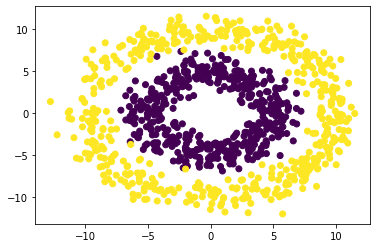

In [72]:
D = 2

R_inner = 5
R_outer = 10


R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [58]:
T.shape

(10000,)

In [20]:
X.shape

(1000, 2)

In [59]:
train_X, val_X, train_y, val_y = train_test_split(X, T, random_state = 0)

In [67]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

In [68]:
precision

array([0.9904, 0.9904, 0.992 , 0.9932, 0.9932, 0.9944, 0.9944, 0.9936])

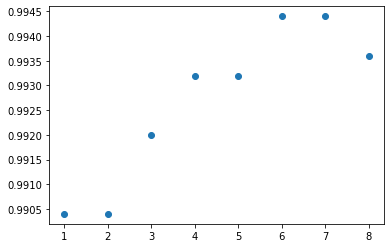

In [69]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

In [25]:
#answer = knn.predict(val_X)
#train_X.shape
#print (answer, val_y)
answer.shape

(250,)

In [24]:
np.mean(answer == val_y)

0.992

# XOR with KNN

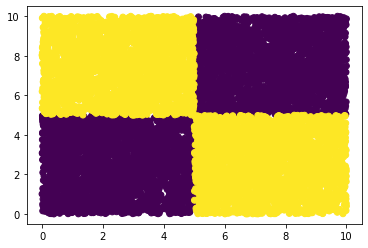

In [78]:
width = 10
half = width//2
first_quat = np.concatenate([[half * np.random.random(N//4) + half],[half * np.random.random(N//4) + half]]).T
second_quat = np.concatenate([[half * np.random.random(N//4)],[half * np.random.random(N//4) + half]]).T
third_quat = np.concatenate([[half * np.random.random(N//4)],[half * np.random.random(N//4)]]).T
fourth_quat = np.concatenate([[half * np.random.random(N//4) + half],[half * np.random.random(N//4)]]).T

odd_quat = np.concatenate([first_quat, third_quat])
even_quat = np.concatenate([second_quat, fourth_quat])
Xxor = np.concatenate([odd_quat, even_quat])
Txor = np.array([0]*(N//2) + [1]*(N//2))

plt.scatter(Xxor[:,0], Xxor[:,1], c = Txor)
plt.show()

In [85]:
Xxor.shape

(10000, 2)

In [79]:
train_X, val_X, train_y, val_y = train_test_split(Xxor, Txor, random_state = 0)

In [80]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

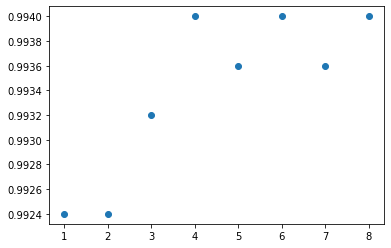

In [81]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

## Ellipse

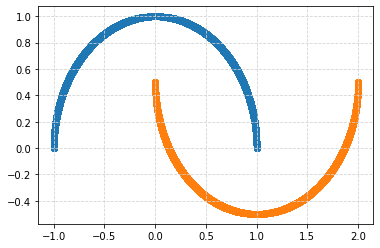

In [101]:
N2 = 10000

u1=0.     #x-position of the center
v1=0.    #y-position of the center
a1=1.     #radius on the x-axis
b1=1.    #radius on the y-axis

t1 = np.linspace(0, np.pi, N2)
El1 = np.array([u1+a1*np.cos(t1), v1+b1*np.sin(t1)])
u2=1.    #x-position of the center
v2=0.5    #y-position of the center
a2=1.     #radius on the x-axis
b2=1.    #radius on the y-axis

t2 = np.linspace(np.pi, 2*np.pi, N2)
El2 = np.array([u2+a2*np.cos(t2), v2+b2*np.sin(t2)])

plt.scatter(El1[0], El1[1])
plt.scatter(El2[0], El2[1])
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [102]:
El = np.concatenate([El1, El2],axis=1).T
print(El.shape)
Tel = np.array([0]*(N2) + [1]*(N2))
print(Tel.shape)

(20000, 2)
(20000,)


In [103]:
train_X, val_X, train_y, val_y = train_test_split(El, Tel, random_state = 0)

In [104]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

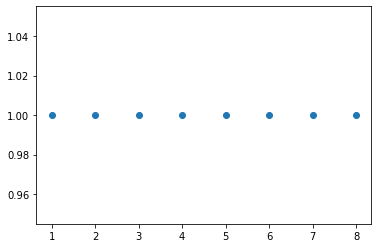

In [105]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

## second problem metricks


In [69]:
import numpy as np
C="Cat"
F="Fish"
H="Hen"

# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H] 

"""

"""
precision = np.zeros(3)
recal = np.zeros(3)
matrix_confusion = np.array([[4,1,1],[6,2,2],[3,0,6]])
precision[0] = matrix_confusion[0,0] / np.sum(matrix_confusion[:,0])
precision[1] = matrix_confusion[1,1] / np.sum(matrix_confusion[:,1])
precision[2] = matrix_confusion[2,2] / np.sum(matrix_confusion[:,2])
recal[0] = matrix_confusion[0,0] / np.sum(matrix_confusion[0,:])
recal[1] = matrix_confusion[1,1] / np.sum(matrix_confusion[1,:])
recal[2] = matrix_confusion[2,2] / np.sum(matrix_confusion[2,:])
f1_score = np.zeros(3)
f1_score = 2 / (1/precision + 1/recal)
TP = matrix_confusion.trace()
FP = np.sum(matrix_confusion) - TP
accuracy = TP/(FP + TP)
weights = [6, 10, 9]
prec_mavg = np.average(precision)
recal_mavg = np.average(recal)
f1_mavg = np.average(f1_score)
prec_wavg = np.average(precision, weights=weights)
recal_wavg = np.average(recal, weights=weights)
f1_wavg = np.average(f1_score, weights=weights)
avg = [[prec_mavg, recal_mavg, f1_mavg],[prec_wavg, recal_wavg, f1_wavg]]

In [75]:
p = precision
r = recal
f1 =f1_score
digits=3
print(matrix_confusion)
target_names = ['Cat', 'Fish', 'Hen']
rows = zip(target_names, p, r, f1,)
headers = ["precision", "recall", "f1-score"]
width = len('weighted avg')
head_fmt = '{:>{width}s} ' + ' {:>9}' * len(headers)
report = head_fmt.format('', *headers, width=width)
report += '\n\n'
row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f}' * 3 + '\n'
for row in rows:
    report += row_fmt.format(*row, width=width, digits=digits)
report += '\n'
row_fmt_accuracy = '{:>{width}s} ' + \
                        ' {:>9.{digits}}' * 2 + ' {:>9.{digits}f}' + \
                        ' \n'
report += row_fmt_accuracy.format('accuracy', '', '',
                                  accuracy, width=width,
                                  digits=digits)
report += row_fmt.format('macro avg', *avg[0],
                                         width=width, digits=digits)
report += row_fmt.format('weighted avg', *avg[1],
                                         width=width, digits=digits)
print(report)

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score

         Cat      0.308     0.667     0.421
        Fish      0.667     0.200     0.308
         Hen      0.667     0.667     0.667

    accuracy                          0.480 
   macro avg      0.547     0.511     0.465
weighted avg      0.581     0.480     0.464

